In [2]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy.stats import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the data 1st
dt=pd.read_csv("/content/delivery_time.csv")

In [4]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
## Now We will form the EDA, below are the things we will carry out during performing EDA
#1- checking the coulmn names if they have any symboles, comma, or hyphine so on and soforth.

In [6]:
## 1- Checking if there is any duplicate values are there
dt[dt.duplicated()].shape

(0, 2)

In [7]:
# 2- Change the column name if unusual signs are there.
#since there are no unusally sign in column name, but still we will change the upper case to lower case.
dt1=dt.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
dt1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
# 3- Checking if there are any null values present in data
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
# 4 Checking the Datatype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


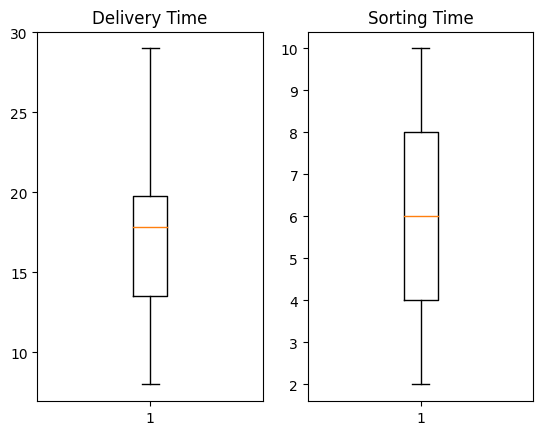

In [10]:
# 5- Now checking if there are any outliers
plt.subplot(121)
plt.boxplot(dt["Delivery Time"])
plt.title("Delivery Time")
plt.subplot(122)
plt.boxplot(dt["Sorting Time"])
plt.title("Sorting Time")
plt.show()

In [11]:
# 6 Checking the corelation between the data
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


Above we can see the positive corellation betn sorting and delivery time, which show that as sorting time is less delivery time is also decrease, resulting quick delivery.

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

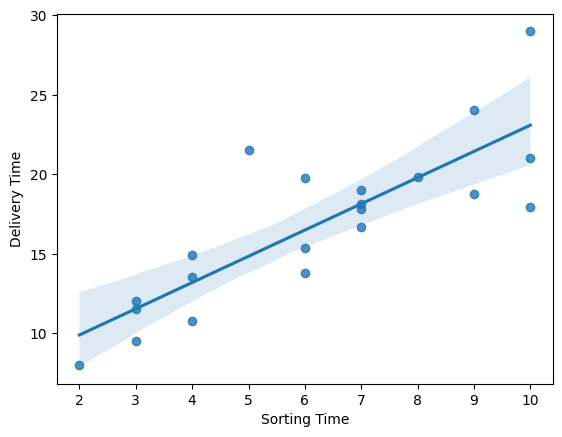

In [12]:
# Now carring the regression analysis
sns.regplot(x=dt["Sorting Time"],y=dt["Delivery Time"])

Where above we can see that there is co relation between the 2 parameters

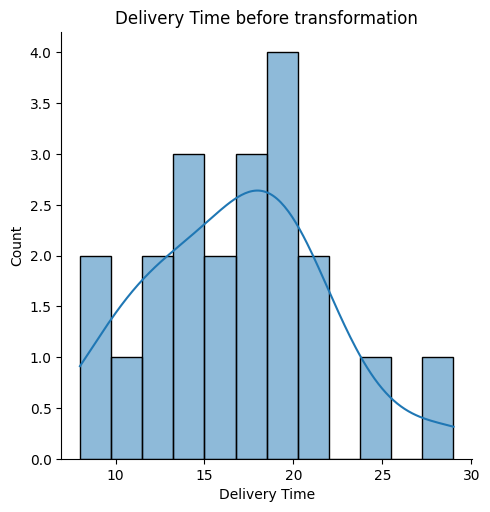

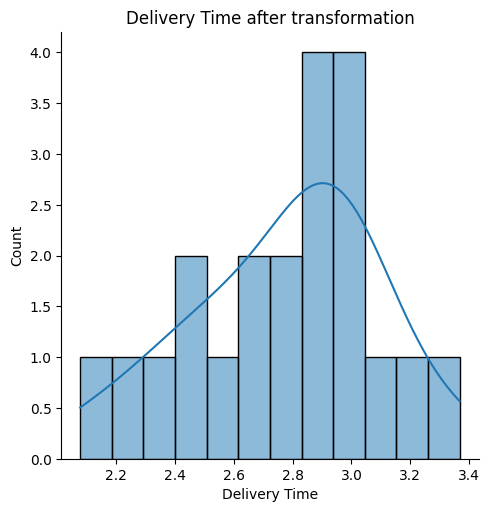

In [13]:
## Now We will perform the Feature engineering, to ensure the data is normally distributed and there is no skewness before building the model
sns.displot(dt["Delivery Time"],bins=12,kde=True)
plt.title("Delivery Time before transformation")
sns.displot(np.log(dt["Delivery Time"]),bins=12,kde=True)
plt.title("Delivery Time after transformation")
plt.show()


In [14]:
# Model Building
import statsmodels.formula.api as smf
model=smf.ols("delivery_time ~ sorting_time",data=dt1).fit() # delivery time is y variable (dependent), sorting time is  variable(independent)

In [15]:
model.rsquared,model.rsquared_adj ## R squared value should be greater above 0.75 for better predicting the data.

(0.6822714748417231, 0.6655489208860244)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        14:56:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# sqrt tranformatio and bulding the model

model1=smf.ols("np.sqrt(delivery_time)~np.sqrt(sorting_time)",data=dt1).fit()

In [18]:
model1.rsquared,model1.rsquared_adj

(0.7292011987544665, 0.7149486302678596)

Above rsquaredvalue satisfies our minimum threshold value, but we check for good and very good models i.e more .85.

# **Tranforming the data by qube root transformation**

In [19]:
## Tranforming the data by qube root transformation
model2=smf.ols("np.cbrt(delivery_time)~np.cbrt(sorting_time)",data=dt1).fit()

In [20]:
model2.rsquared,model2.rsquared_adj

(0.7441167577566266, 0.7306492186911859)

With cube root tranformation we got a better rsquared value,now lets go for log transformation.

# **Log Tranformation**

In [21]:
## tranformation with log
model3=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=dt1).fit()

In [22]:
model3.rsquared,model3.rsquared_adj

(0.77216134926874, 0.7601698413355158)

# ***So as per the highest Rsquared value we can say that the best model is model3 which we transformed by log Transformation.***

In [23]:
sd=pd.read_csv("/content/Salary_Data.csv")

In [24]:
sd.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **EDA**

In [25]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [27]:
# Checking null values
sd.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [28]:
# Checking duplicate values
sd[sd.duplicated()].shape

(0, 2)

<ipython-input-29-4ca9b7e4023b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


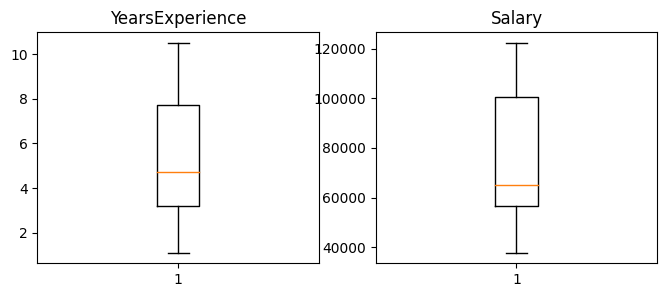

In [29]:
# Outlier check

plt.subplots(figsize=(8,3))
plt.subplot(121)
plt.boxplot(sd["YearsExperience"])
plt.title("YearsExperience")
plt.subplot(122)
plt.boxplot(sd["Salary"])
plt.title("Salary")
plt.show()

In [30]:
# Checking the corealtion between x and y variable, where Salary is y(dependent) & Experience is X(independent)
sd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Where we can see that there is high correlation between x and y which means more the salary(y) is higly dependent on expreience(x)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

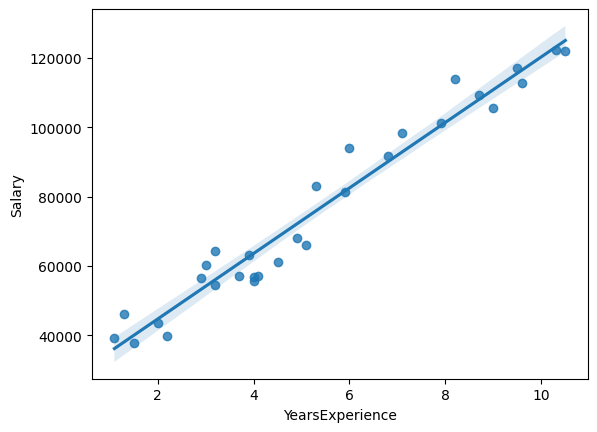

In [31]:
## Regression plot to visualise the coreelation
sns.regplot(x=sd["YearsExperience"],y=sd["Salary"])

Above regression plot shows that the X and Y variables are highly correlated with each other, as most of the data ponits are closer.

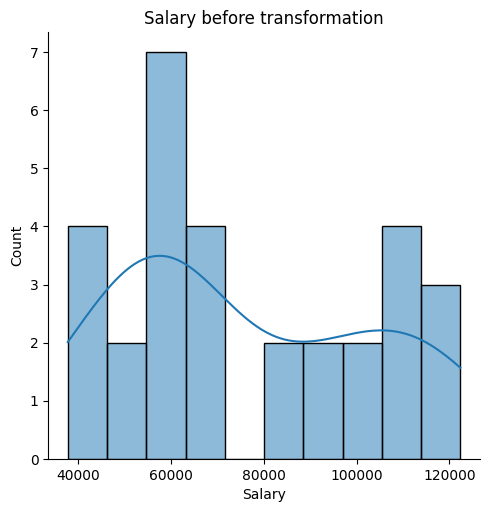

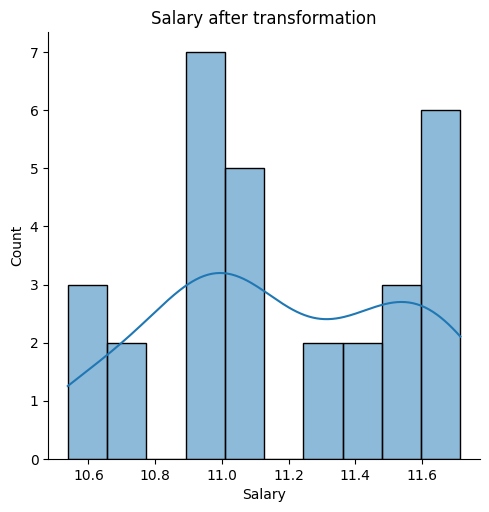

In [32]:
## Feature enggineering, where in we can see the visualisation transfomation to reduce remove the skewness and bring the data near to normal distribution
sns.displot(sd["Salary"],bins=10,kde=True)
plt.title("Salary before transformation")
sns.displot(np.log(sd["Salary"]),bins=10,kde=True)
plt.title("Salary after transformation")
plt.show()

In [33]:
## Modelbulding with transforming the, we will check which transformation give highest Rsquared Value.
import statsmodels.formula.api as smf
model1=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=sd).fit()

In [34]:
model1.rsquared,model1.rsquared_adj

(0.905215072581715, 0.9018298966024905)

In [35]:
model2=smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data=sd).fit()

In [ ]:
model2.rsquared,model2.rsquared_adj

In [36]:
model3=smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data=sd).fit()

In [37]:
model3.rsquared,model3.rsquared_adj

(0.9324434036761003, 0.9300306680931039)

# **With the above result as we can clearly see that the square root tranformation give us the highest rsquared value, which means that it is the best model is model3.**